In [29]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.graphics.api import qqplot
%matplotlib inline

In [2]:
df=pd.read_csv("daily-total-female-births-CA.csv")

In [3]:
df.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [4]:
df1=pd.read_csv("daily-total-female-births-CA.csv", index_col=[0], parse_dates=[0])

In [5]:
df1.head()

,births
date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [6]:
df1.describe()

,births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


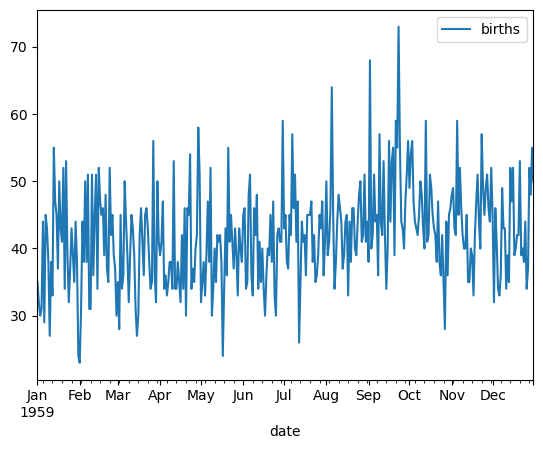

In [7]:
df1.plot()
plt.show()

In [8]:

moving_average_birth=df1.rolling(window=20).mean()  # window: This is the number of observations used for calculating the statistic. 

In [9]:
moving_average_birth

,births
date,
1959-01-01,NaN
1959-01-02,NaN
1959-01-03,NaN
1959-01-04,NaN
1959-01-05,NaN
...,...
1959-12-27,42.10
1959-12-28,42.25
1959-12-29,42.50


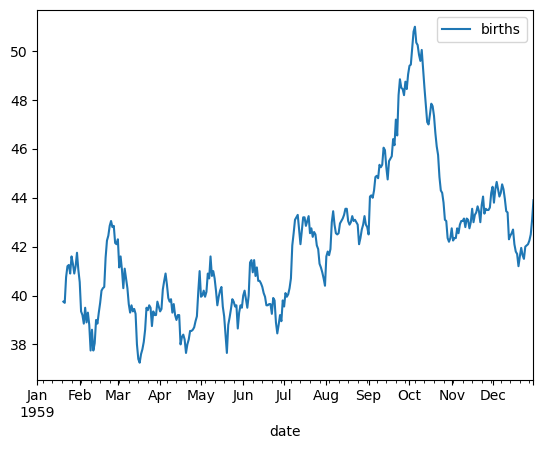

In [10]:
moving_average_birth.plot()# we can see that there is a peak in the month of october
plt.show()

In [14]:
sm.stats.durbin_watson(df1) # very less correlation

array([0.04624491])

C:\Users\amanr\AppData\Local\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


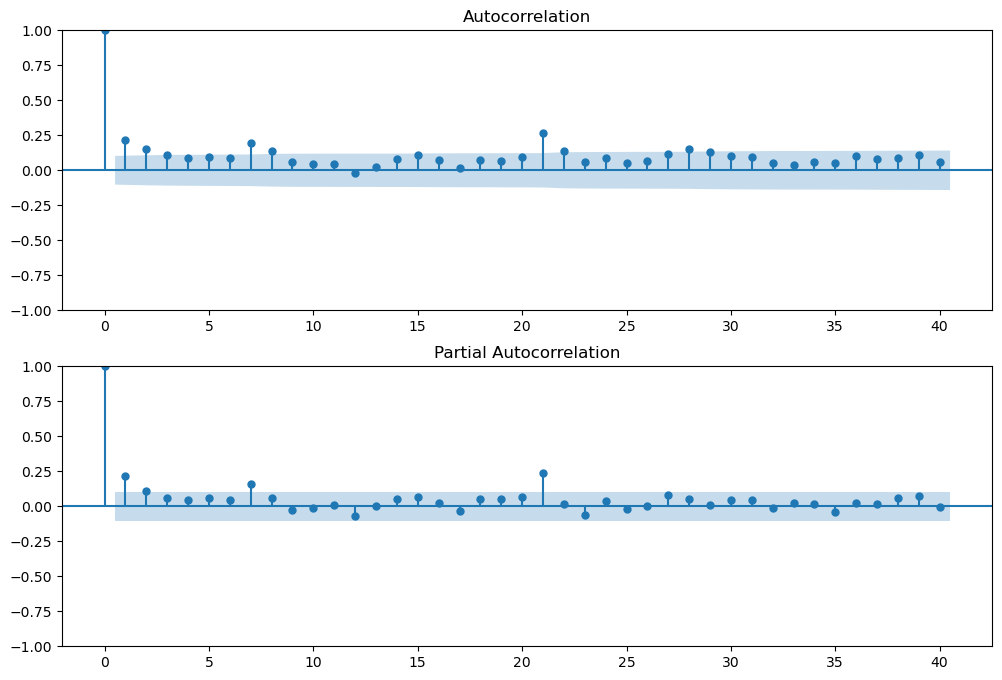

In [15]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df1.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df1, lags=40, ax=ax2)
plt.show()

In [16]:
training_data=df1[0:320]
test_data=df1[320:]

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
training_data,test_data=train_test_split(df1)

In [25]:
from statsmodels.tsa.arima.model import ARIMA

C:\Users\amanr\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\amanr\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\amanr\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 births   No. Observations:                  365
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1245.097
Date:                Sat, 23 Dec 2023   AIC                           2502.194
Time:                        01:12:25   BIC                           2525.577
Sample:                    01-01-1959   HQIC                          2511.488
                         - 12-31-1959                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7237      0.057    -12.664      0.000      -0.836      -0.612
ar.L2         -0.5426      0.063     -8.550      0.000      -0.667      -0.418
ar.L3         -0.4115      0.068     -6.036      0.0

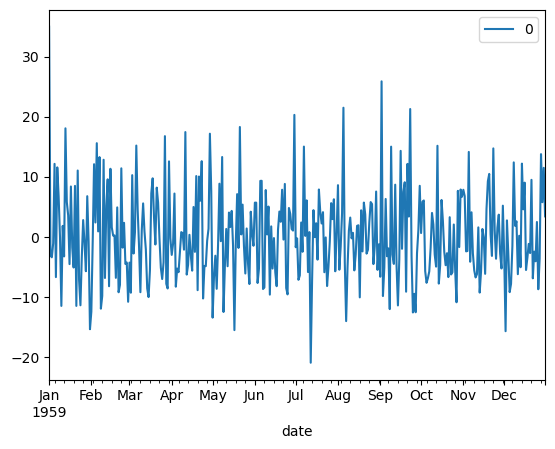

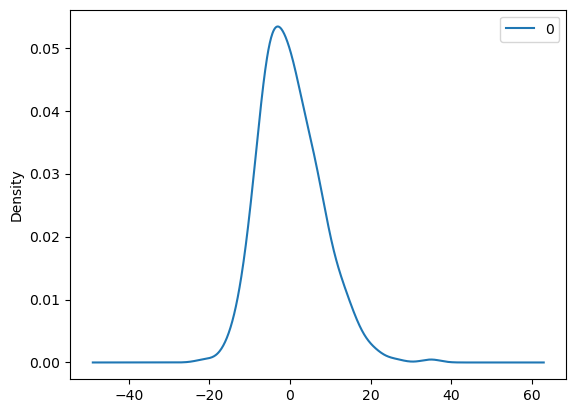

                0
count  365.000000
mean     0.223523
std      7.616635
min    -20.931817
25%     -5.255864
50%     -0.713984
75%      4.990481
max     35.000000


In [33]:
model = ARIMA(df1, order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())
plt.show()

predicted=43.832876, expected=51.000000
predicted=45.472162, expected=41.000000
predicted=44.403323, expected=44.000000
predicted=44.978132, expected=38.000000
predicted=40.704504, expected=68.000000
predicted=51.812877, expected=40.000000
predicted=48.899087, expected=42.000000
predicted=48.683023, expected=51.000000
predicted=44.950643, expected=44.000000
predicted=45.690206, expected=45.000000
predicted=46.394793, expected=36.000000
predicted=41.187132, expected=57.000000
predicted=46.643063, expected=44.000000
predicted=46.038912, expected=42.000000
predicted=46.989755, expected=53.000000
predicted=46.765776, expected=42.000000
predicted=45.611992, expected=34.000000
predicted=42.232407, expected=40.000000
predicted=38.665855, expected=56.000000
predicted=44.347709, expected=44.000000
predicted=46.564600, expected=53.000000
predicted=51.019379, expected=55.000000
predicted=51.071080, expected=39.000000
predicted=48.317797, expected=59.000000
predicted=51.362822, expected=55.000000


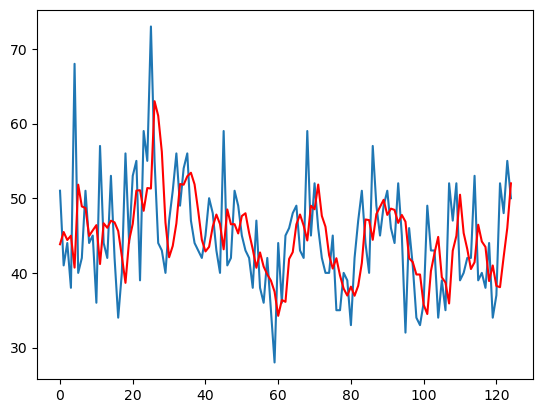

In [35]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

X = df1.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(2,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()
